In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

## Reading and Understanding the data

In [4]:
df = pd.read_csv('Data.csv', sep = ',')


In [5]:
labels_df = pd.read_csv('Labels.csv')

In [6]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [7]:
labels_df.head()

,Variable Name,Variable Label,Variable Scale
0,id,Participants ID number,string
1,age,age at questionnaire 20-21,numeric
2,year,CURICULUM YEAR : In which curriculum year are ...,1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6...
3,sex,GENDER : To which gender do you identify the m...,1=Man; 2=Woman; 3=Non-binary
4,glang,MOTHER TONGUE: What is your mother tongue?,1=French; 15=German; 20=English; 37=Arab; 51=B...


In [8]:
for i in range(len(labels_df)):
    print(labels_df['Variable Label'][i].split(':')[0])

Participants ID number
age at questionnaire 20-21
CURICULUM YEAR 
GENDER 
MOTHER TONGUE
PARTNERSHIP STATUS 
HAVING A JOB 
HOURS OF STUDY PER WEEK 
SATISFACTION WITH HEALTH 
PSYCHOTHERAPY LAST YEAR 
JSPE total empathy score
QCAE Cognitive empathy score
QCAE Affective empathy score
AMSP total score
GERT 
CES-D total score
STAI score
MBI Emotional Exhaustion
MBI Cynicism 
MBI Academic Efficacy 


In [9]:
df.columns

Index(['id', 'age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')

## Data Cleaning and PreProcessing

In [10]:
for i in range(len(labels_df)):
    print(labels_df['Variable Name'][i], " : ", labels_df['Variable Scale'][i])

id  :  string
age  :  numeric
year  :  1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6=Mmed3
sex  :  1=Man; 2=Woman; 3=Non-binary
glang  :  1=French; 15=German; 20=English; 37=Arab; 51=Basque; 52=Bulgarian; 53=Catalan; 54=Chinese; 59=Korean; 60=Croatian; 62=Danish; 63=Spanish; 82=Estonian; 83=Finnish; 84=Galician; 85=Greek; 86=Hebrew; 87=Hindi; 88=Hungarian; 89=Indonesian; 90=Italian; 92=Japanese; 93=Kazakh; 94=Latvian; 95=Lithuanian; 96=Malay; 98=Dutch; 100=Norwegian; 101=Polish; 102=Portuguese; 104=Romanian; 106=Russian; 108=Serbian; 112=Slovak; 113=Slovenian; 114=Swedish; 116=Czech; 117=Thai; 118=Turkish; 119=Ukrainian; 120=Vietnamese; 121=Other
part  :  0=No; 1=Yes
job  :  0=No; 1=Yes
stud_h  :  nan
health  :  1=Verydissatisfied; 2=Dissatisfied; 3=Neithersatisfiednordissatisfied; 4=Satisfied; 5=Verysatisfied
psyt  :  0=No; 1=Yes
jspe  :  numeric
qcae_cog  :  numeric
qcae_aff  :  numeric
amsp  :  numeric
erec_mean  :  numeric
cesd  :  numeric
stai_t  :  numeric
mbi_ex  :  numeric
mbi

In [11]:
# Renaming the columns values 

df['year'].replace({1:'Bmed1', 2:'Bmed2', 3:'Bmed3', 4:'Mmed1', 5:'Mmed2', 6:'Med3'}, inplace = True)

df['sex'].replace({1:'Male', 2:'Female', 3:'Non Binary'}, inplace = True)

df['glang'].replace({1: 'French', 15: 'German', 20: 'English', 37: 'Arab', 51: 'Basque', 
                    52: 'Bulgarian', 53: 'Catalan', 54: 'Chinese', 59: 'Korean', 60: 'Croatian', 
                    62: 'Danish', 63: 'Spanish', 82: 'Estonian', 83: 'Finnish', 84: 'Galician', 
                    85: 'Greek', 86: 'Hebrew', 87: 'Hindi', 88: 'Hungarian', 89: 'Indonesian', 
                    90: 'Italian', 92: 'Japanese', 93: 'Kazakh', 94: 'Latvian', 95: 'Lithuanian', 
                    96: 'Malay', 98: 'Dutch', 100: 'Norwegian', 101: 'Polish', 102: 'Portuguese', 
                    104: 'Romanian', 106: 'Russian', 108: 'Serbian', 112: 'Slovak', 113: 'Slovenian', 
                    114: 'Swedish', 116: 'Czech', 117: 'Thai', 118: 'Turkish', 119: 'Ukrainian', 
                    120: 'Vietnamese', 121: 'Other'}, inplace = True)

df['part'].replace({0:'No', 1:'Yes'}, inplace = True)

df['psyt'].replace({0:'No', 1:'Yes'}, inplace = True)

df['health'].replace({1: 'Very Dissatisfied', 2: 'Dissatisfied', 3: 'Neither Satisfied Nor Dissatisfied',
                        4: 'Satisfied', 5: 'Very Satisfied'}, inplace = True)

In [12]:
# Renamin the columns 

df.rename(columns = {'id': 'ID _Number',
            'age': 'AGE',
            'year': 'CURICULUM_YEAR',
            'sex': 'GENDER',
            'glang': 'MOTHER_TONGUE',
            'part': 'PARTNERSHIP_STATUS',
            'job': 'JOB_SATISFACTION',
            'stud_h': 'HOURS_OF_STUDY_PER_WEEK',
            'health': 'SATISFACTION_WITH_HEALTH',
            'psyt': 'PSYCHOTHERAPY_LAST_YEAR',
            'jspe': 'Total_Empathy_Score',
            'qcae_cog': 'QCAE_Cognitive_empathy_score',
            'qcae_aff': 'QCAE_Affective_empathy_score',
            'amsp': 'AMSP_total_score',
            'erec_mean': 'GERT',
            'cesd': 'CES-D_total_score',
            'stai_t': 'STAI_score',
            'mbi_ex': 'MBI_Emotional_Exhaustion',
            'mbi_cy': 'MBI_Cynicism',
            'mbi_ea': 'MBI_Academic_Efficacy'}, 
              inplace = True)

In [13]:
df.head()

,ID _Number,AGE,CURICULUM_YEAR,GENDER,MOTHER_TONGUE,PARTNERSHIP_STATUS,JOB_SATISFACTION,HOURS_OF_STUDY_PER_WEEK,SATISFACTION_WITH_HEALTH,PSYCHOTHERAPY_LAST_YEAR,Total_Empathy_Score,QCAE_Cognitive_empathy_score,QCAE_Affective_empathy_score,AMSP_total_score,GERT,CES-D_total_score,STAI_score,MBI_Emotional_Exhaustion,MBI_Cynicism,MBI_Academic_Efficacy
0,2,18,Bmed1,Male,Vietnamese,Yes,0,56,Neither Satisfied Nor Dissatisfied,No,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,Mmed1,Male,French,Yes,0,20,Satisfied,No,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,Bmed3,Female,French,No,0,36,Neither Satisfied Nor Dissatisfied,No,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,Bmed2,Female,French,No,1,51,Very Satisfied,No,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,Bmed3,Male,French,Yes,0,22,Satisfied,No,102,58,28,21,0.690476,14,46,22,14,23


In [14]:
df.isna().sum()

ID _Number                      0
AGE                             0
CURICULUM_YEAR                  0
GENDER                          0
MOTHER_TONGUE                   0
PARTNERSHIP_STATUS              0
JOB_SATISFACTION                0
HOURS_OF_STUDY_PER_WEEK         0
SATISFACTION_WITH_HEALTH        0
PSYCHOTHERAPY_LAST_YEAR         0
Total_Empathy_Score             0
QCAE_Cognitive_empathy_score    0
QCAE_Affective_empathy_score    0
AMSP_total_score                0
GERT                            0
CES-D_total_score               0
STAI_score                      0
MBI_Emotional_Exhaustion        0
MBI_Cynicism                    0
MBI_Academic_Efficacy           0
dtype: int64

## Performing EDA

In [15]:
categorical_data = ['CURICULUM_YEAR', 'GENDER', 'MOTHER_TONGUE',
                   'PARTNERSHIP_STATUS','SATISFACTION_WITH_HEALTH',
                    'PSYCHOTHERAPY_LAST_YEAR']
numerical_data = ['AGE', 'HOURS_OF_STUDY_PER_WEEK', 'JOB_SATISFACTION','Total_Empathy_Score', 'QCAE_Cognitive_empathy_score',
                  'QCAE_Affective_empathy_score', 'AMSP_total_score', 'GERT', 'CES-D_total_score', 'STAI_score',
                  'MBI_Emotional_Exhaustion', 'MBI_Cynicism', 'MBI_Academic_Efficacy']


In [16]:
df[categorical_data].describe()

,CURICULUM_YEAR,GENDER,MOTHER_TONGUE,PARTNERSHIP_STATUS,SATISFACTION_WITH_HEALTH,PSYCHOTHERAPY_LAST_YEAR
count,886,886,886,886,886,886
unique,6,3,19,2,5,2
top,Bmed1,Female,French,Yes,Satisfied,No
freq,245,606,717,499,402,687


In [17]:
df[numerical_data].describe()

,AGE,HOURS_OF_STUDY_PER_WEEK,JOB_SATISFACTION,Total_Empathy_Score,QCAE_Cognitive_empathy_score,QCAE_Affective_empathy_score,AMSP_total_score,GERT,CES-D_total_score,STAI_score,MBI_Emotional_Exhaustion,MBI_Cynicism,MBI_Academic_Efficacy
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,25.288939,0.348758,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,3.300664,15.927875,0.476847,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,17.000000,0.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,20.000000,12.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,22.000000,25.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,24.000000,36.000000,1.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,49.000000,70.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [18]:
df[numerical_data].corr()

,AGE,HOURS_OF_STUDY_PER_WEEK,JOB_SATISFACTION,Total_Empathy_Score,QCAE_Cognitive_empathy_score,QCAE_Affective_empathy_score,AMSP_total_score,GERT,CES-D_total_score,STAI_score,MBI_Emotional_Exhaustion,MBI_Cynicism,MBI_Academic_Efficacy
AGE,1.000000,-0.293557,0.226448,0.223221,0.059355,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
HOURS_OF_STUDY_PER_WEEK,-0.293557,1.000000,-0.202371,-0.134662,-0.023048,-0.032268,-0.001583,-0.056122,0.174085,0.152052,0.185804,-0.087386,0.101732
JOB_SATISFACTION,0.226448,-0.202371,1.000000,0.077749,0.024697,-0.000171,0.028291,0.015056,-0.059803,-0.063029,-0.065522,0.009590,-0.018498
Total_Empathy_Score,0.223221,-0.134662,0.077749,1.000000,0.342668,0.263384,0.099395,0.097062,-0.080058,-0.075036,-0.040542,-0.006981,0.082508
QCAE_Cognitive_empathy_score,0.059355,-0.023048,0.024697,0.342668,1.000000,0.258696,0.386682,0.073708,-0.034244,-0.077868,-0.023630,-0.024820,0.184096
QCAE_Affective_empathy_score,-0.008130,-0.032268,-0.000171,0.263384,0.258696,1.000000,-0.071391,0.141379,0.250947,0.331350,0.215886,0.128488,-0.113891
AMSP_total_score,0.000477,-0.001583,0.028291,0.099395,0.386682,-0.071391,1.000000,0.002780,-0.152052,-0.249231,-0.073011,-0.029343,0.220616
GERT,-0.018699,-0.056122,0.015056,0.097062,0.073708,0.141379,0.002780,1.000000,0.029881,0.037688,0.015348,0.061965,-0.034889
CES-D_total_score,-0.139106,0.174085,-0.059803,-0.080058,-0.034244,0.250947,-0.152052,0.029881,1.000000,0.715728,0.605617,0.407727,-0.453589
STAI_score,-0.081893,0.152052,-0.063029,-0.075036,-0.077868,0.331350,-0.249231,0.037688,0.715728,1.000000,0.530486,0.331884,-0.462535


In [19]:
stats_df = df[numerical_data].describe().loc[['mean', 'std']]

# Calculate skewness and kurtosis
skewness = df.skew()
kurt = df.kurtosis()

# Add skewness and kurtosis to the stats DataFrame
stats_df.loc['skewness'] = skewness
stats_df.loc['kurtosis'] = kurt

# Transpose the DataFrame for better readability
stats_df = stats_df.T
columns = {'mean':'Mean', 'std' : 'Standard Deviation', 'skewness' : 'Skewness', 'kurtosis': 'Kurtosis'}
stats_df = stats_df.rename(columns = columns)
# Display the table
stats_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3384\1116036994.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3384\1116036994.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis()


,Mean,Standard Deviation,Skewness,Kurtosis
AGE,22.383747,3.300664,2.073981,9.432584
HOURS_OF_STUDY_PER_WEEK,25.288939,15.927875,0.451781,-0.484754
JOB_SATISFACTION,0.348758,0.476847,0.635776,-1.599405
Total_Empathy_Score,106.374718,8.784012,-0.664260,0.714482
QCAE_Cognitive_empathy_score,58.525959,6.570341,-0.086985,0.119075
QCAE_Affective_empathy_score,34.784424,5.377062,-0.198707,-0.224084
AMSP_total_score,23.150113,4.993220,-0.114101,-0.054603
GERT,0.720144,0.093570,-0.405534,0.237759
CES-D_total_score,18.050790,11.478731,0.682456,-0.077361
STAI_score,42.898420,11.978458,0.243806,-0.407489


In [20]:
def plot_categorical_pie_charts(dataframe, column_names):
    """
    Generate three pie charts for different categorical variables from a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_names (list): A list of column names for the categorical variables.

    Returns:
    - None
    """
    num_rows = len(column_names) // 2 + len(column_names) % 2

    # Create subplots for pie charts
    fig, axs = plt.subplots(num_rows, 2, figsize=(16, 8*num_rows))

    for i, column_name in enumerate(column_names):
        # Calculate the row and column index for the subplot
        row_index = i // 2
        col_index = i % 2

        # Count the occurrences of each unique value in the column
        counts = dataframe[column_name].value_counts()

        # Pie chart for the current categorical variable
        axs[row_index, col_index].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axs[row_index, col_index].set_title(f'{column_name} Distribution')

        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[row_index, col_index].axis('equal')

    # Hide empty subplots
    for i in range(len(column_names), num_rows * 2):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()



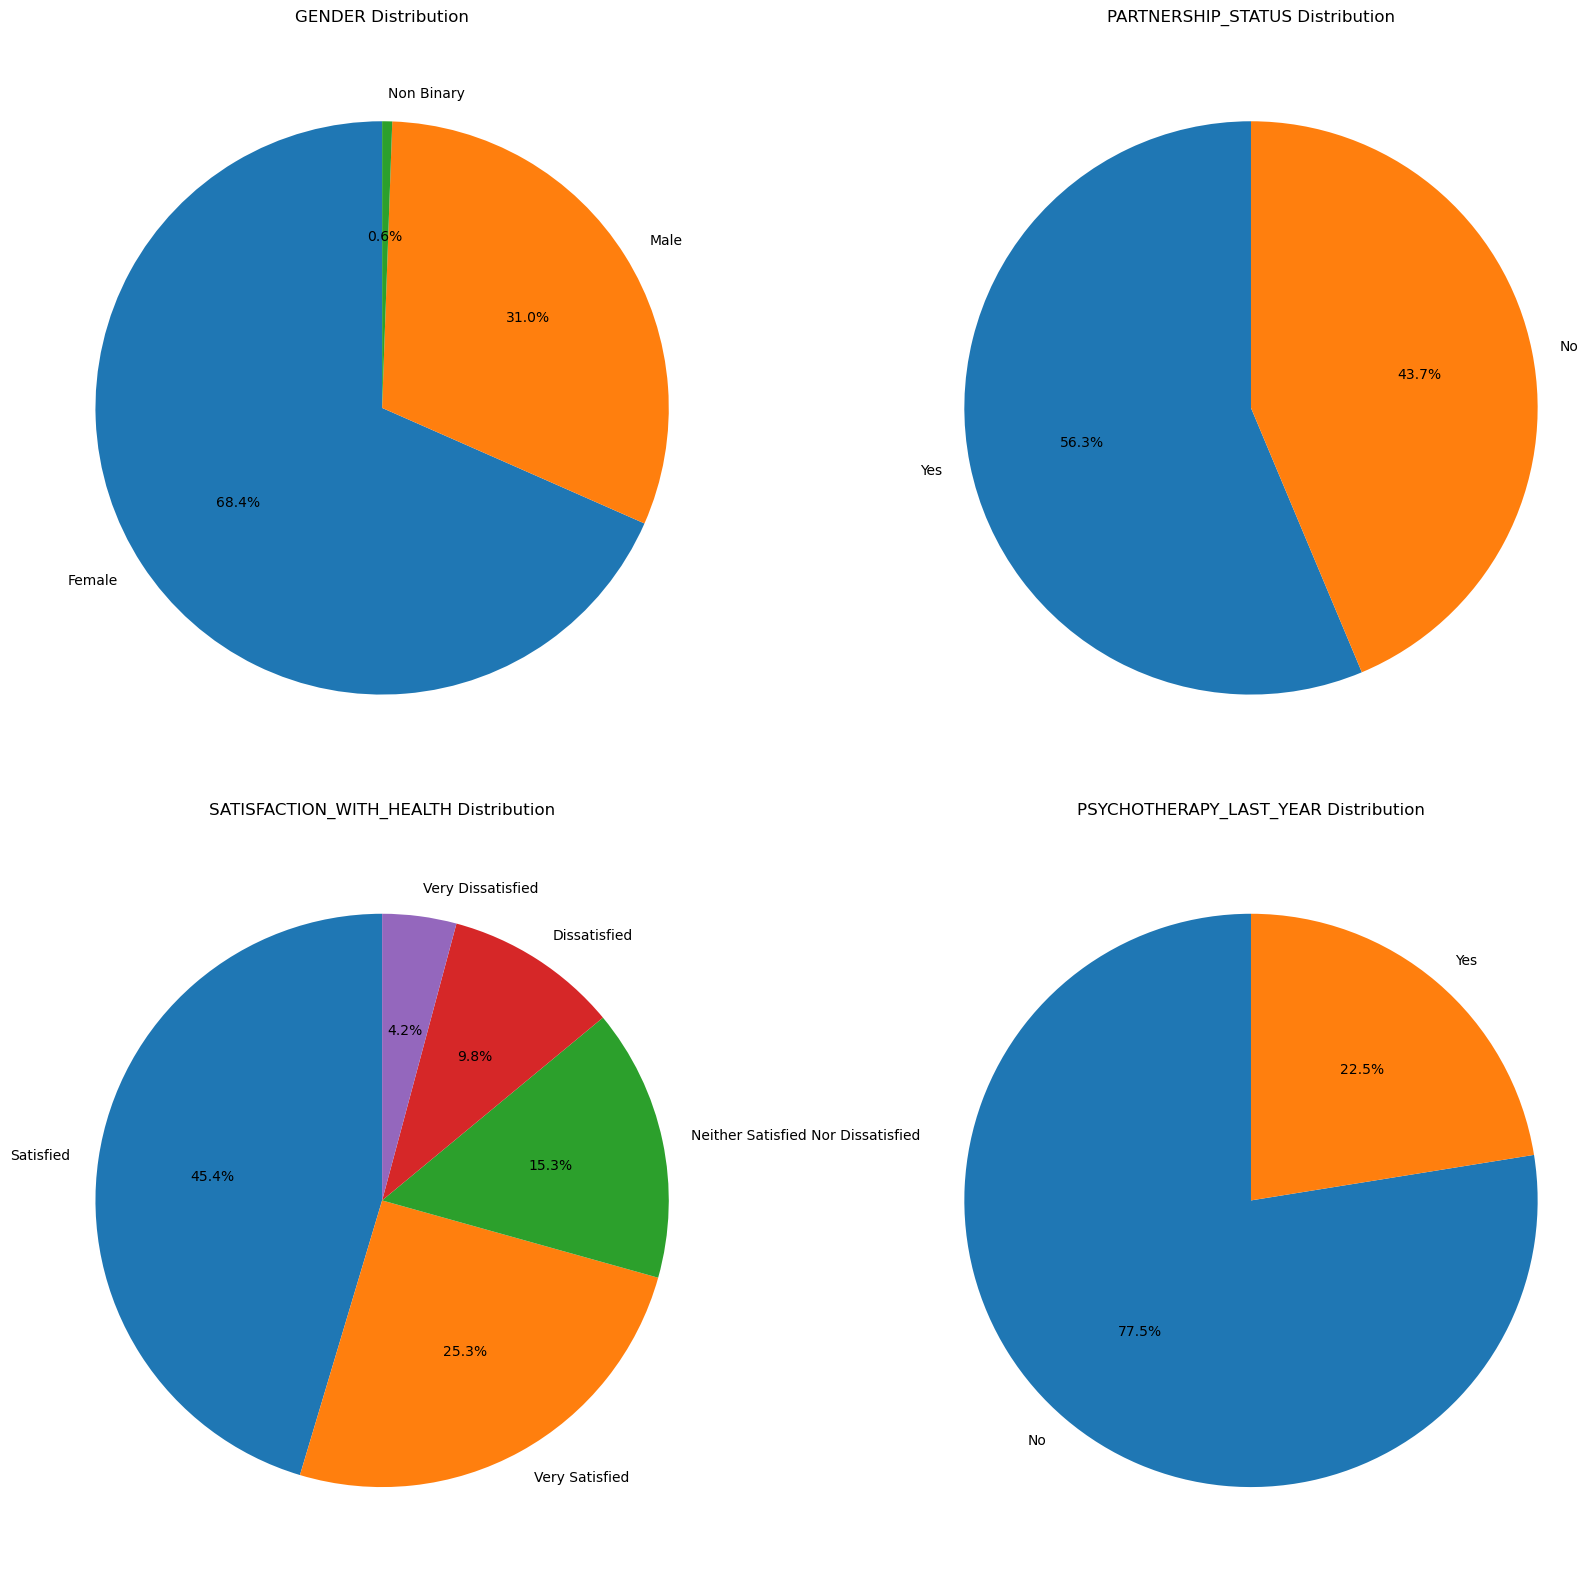

In [21]:
column_names = ['GENDER','PARTNERSHIP_STATUS','SATISFACTION_WITH_HEALTH','PSYCHOTHERAPY_LAST_YEAR']
plot_categorical_pie_charts(df[categorical_data], column_names)

In [22]:
def boxplot(df):
    """
    Check for outliers in the numerical data using a boxplot.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    numerical_data (list): A list of column names containing numerical data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[numerical_data])
    plt.title("Boxplot of all the numerical values")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.xticks(rotation=90)
    plt.show()

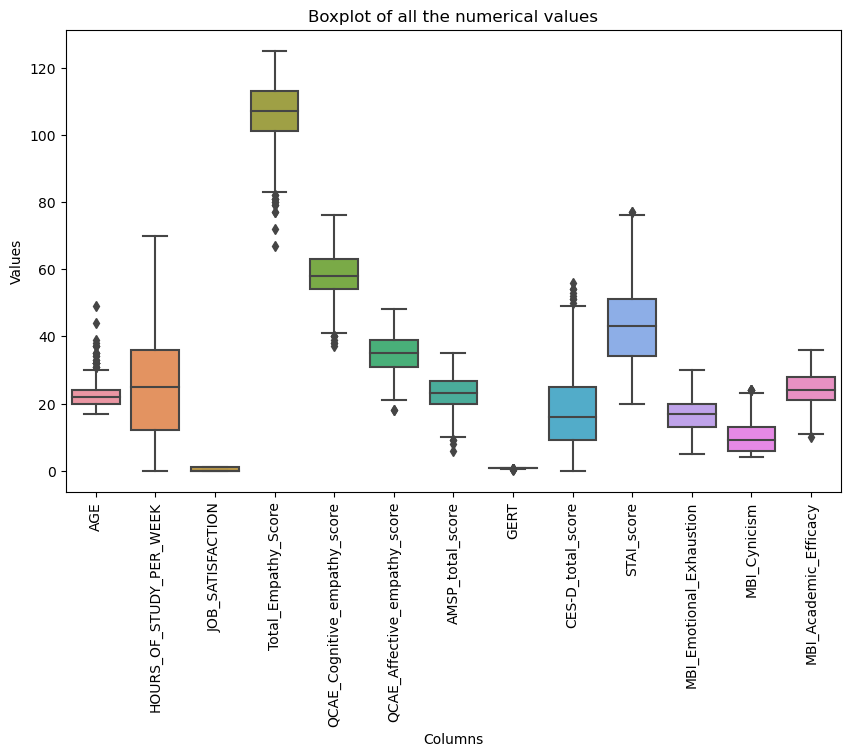

In [23]:
boxplot(df)

In [24]:
def heatmap(dataframe):
    """
    Visualize the correlation matrix of a DataFrame using a heatmap.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))
    sns.heatmap(dataframe.corr(), annot=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

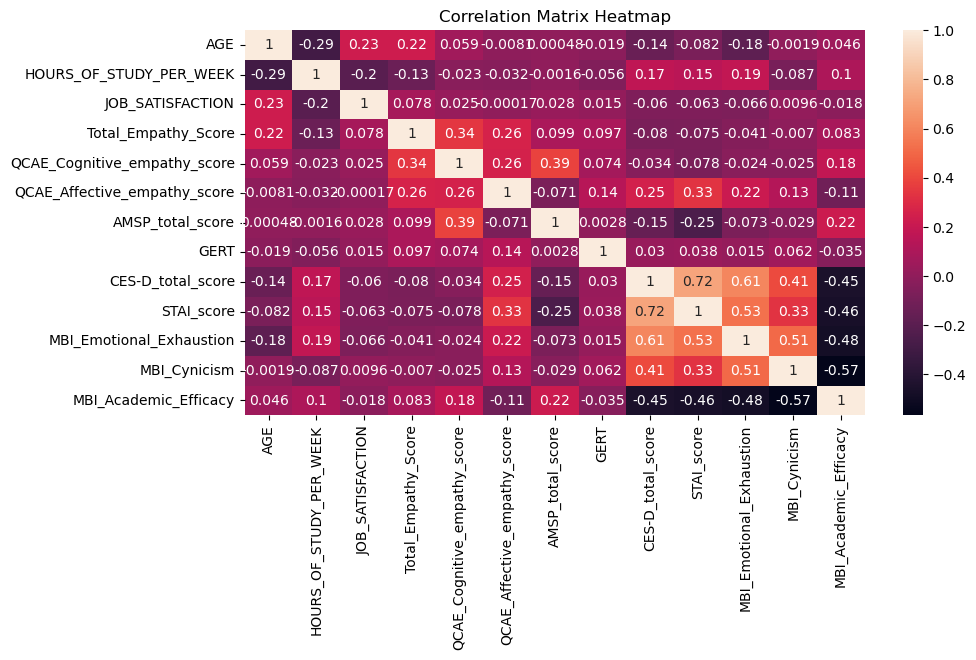

In [25]:
heatmap(df[numerical_data])

In [26]:
def fit_regression_model(data):
    """
    Fit a linear regression model to the given dataset.

    Parameters:
        data (DataFrame): The input DataFrame containing both independent and dependent variables.

    Returns:
        tuple: A tuple containing the trained linear regression model, X_test, and y_test.
               - model (LinearRegression): The trained linear regression model.
               - X_test (DataFrame): The features (independent variables) for testing.
               - y_test (Series): The target (dependent variable) for testing.
    """
    # Extract independent and dependent variables from the data
    X = data[independent_vars]
    y = data[dependent_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Return the trained model and testing data
    return model, X_test, y_test

In [27]:
# Define independent and dependent variables
independent_vars = ['CES-D_total_score']
dependent_var = 'MBI_Emotional_Exhaustion'  

model, X_test, y_test = fit_regression_model(df)


In [28]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Model - Mean Squared Error:", mse)
print("Model - R-squared Score:", r2)

Model - Mean Squared Error: 19.136520826501318
Model - R-squared Score: 0.32818824923312484


In [29]:
confidence = 0.95
n = len(X_test)
mean_x = np.mean(X_test)
t_value = 2.262  # for 95% confidence interval with n-2 degrees of freedom
se = np.sqrt(np.sum((y_test - predictions)**2) / (n - 2))
margin_of_error = t_value * se
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error


C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [30]:
def plot_regression_results(X_test, y_test, predictions, margin_of_error):
    """
    Plot the results of a regression model, including actual vs. predicted values with confidence intervals.

    Parameters:
        X_test (array-like): The feature values for testing.
        y_test (array-like): The actual target values for testing.
        predictions (array-like): The predicted target values.
        margin_of_error (array-like): The margin of error for each prediction.

    Returns:
        None
    """
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='green', label='Actual (CO(GT))', marker='o')
    plt.plot(X_test, predictions, color='blue', label='Predicted (CO(GT))', marker='x')
    plt.errorbar(X_test, predictions, yerr=margin_of_error, fmt='o', color='black', label='95% Confidence Intervals', capsize=4, elinewidth=0.5, capthick=0.5)
    plt.xlabel('CES-D_total_score')
    plt.ylabel('MBI_Emotional_Exhaustion')
    plt.title('Fitted Regression Line with Confidence Intervals')
    plt.legend()
    plt.grid(True)

    plt.show()

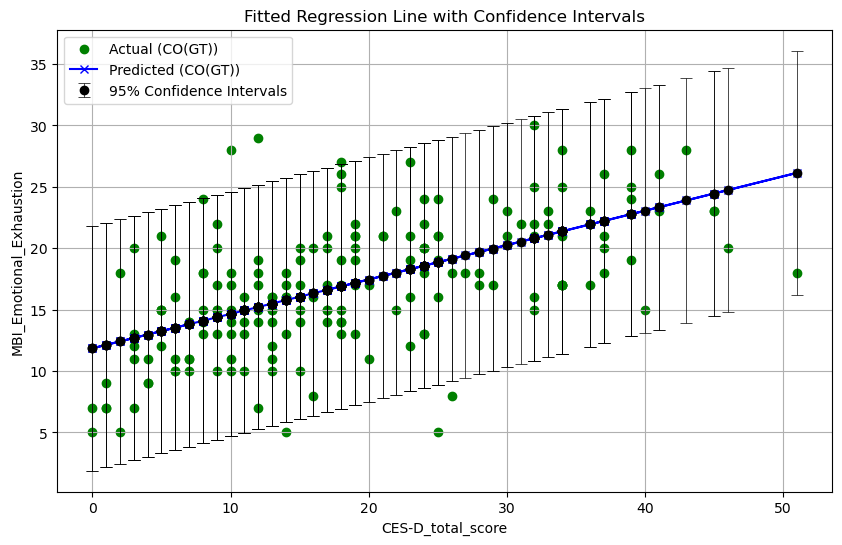

In [31]:
plot_regression_results(X_test, y_test, predictions, margin_of_error)

## Clustering

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
def remove_outliers(df):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate the interquartile range (IQR) for each column
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where any column value is outside the bounds
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [34]:
cluster_df = df.copy()

In [35]:
cluster_df = remove_outliers(cluster_df)

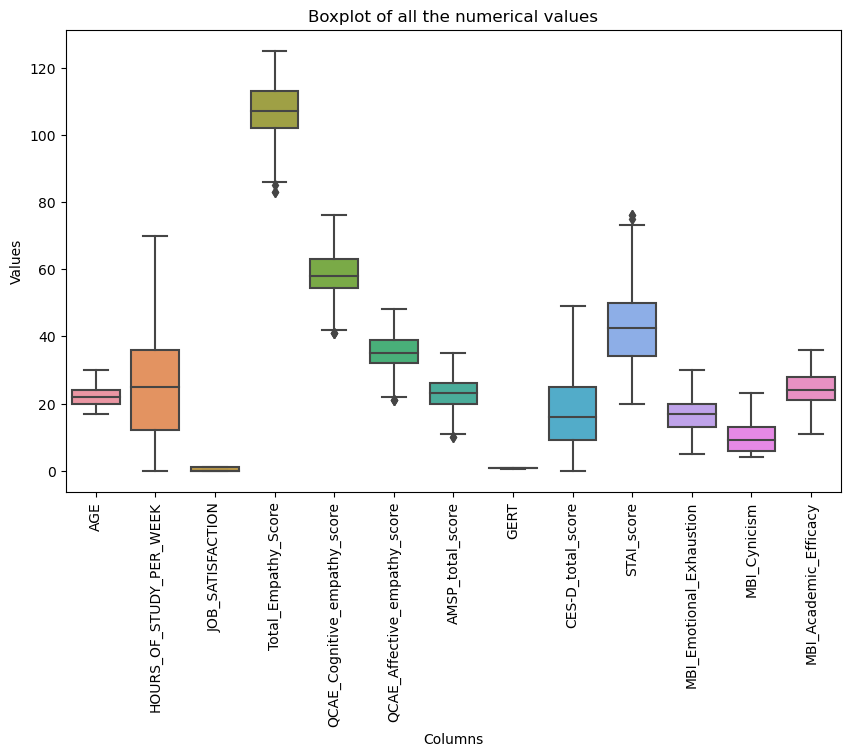

In [36]:
boxplot(cluster_df)

## Feature Selection

In [37]:
# Feature Importance Ranking using Random Forest Regressor
numeric_data = cluster_df[numerical_data].copy()
X = numeric_data.drop(columns=['Total_Empathy_Score'])  
y = numeric_data['Total_Empathy_Score']
regressor = RandomForestRegressor()
regressor.fit(X, y)
feature_importance = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importance ranking using Random Forest Regressor:")
print(feature_importance)


Feature importance ranking using Random Forest Regressor:
QCAE_Cognitive_empathy_score    0.178444
QCAE_Affective_empathy_score    0.111337
AGE                             0.109303
STAI_score                      0.092150
HOURS_OF_STUDY_PER_WEEK         0.081750
CES-D_total_score               0.076831
AMSP_total_score                0.074305
MBI_Academic_Efficacy           0.073915
MBI_Emotional_Exhaustion        0.064866
GERT                            0.064659
MBI_Cynicism                    0.061359
JOB_SATISFACTION                0.011080
dtype: float64


In [38]:
selected_columns = ['STAI_score', 'CES-D_total_score', 'MBI_Academic_Efficacy', 'MBI_Emotional_Exhaustion']
data = cluster_df[selected_columns]

# Normalize and back-scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Use the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, clusters))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting at 2 clusters
print("Optimal Value of K: ", optimal_k)


Optimal Value of K:  2


In [39]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Set the number of components as per your requirement
pca.fit(scaled_data)
pca_components = pca.components_
print("\nPrincipal Components from PCA:")
print(pca_components)


Principal Components from PCA:
[[ 0.52415046  0.53876411 -0.43235239  0.4980672 ]
 [ 0.35133014  0.37958827  0.85500005 -0.0381416 ]]


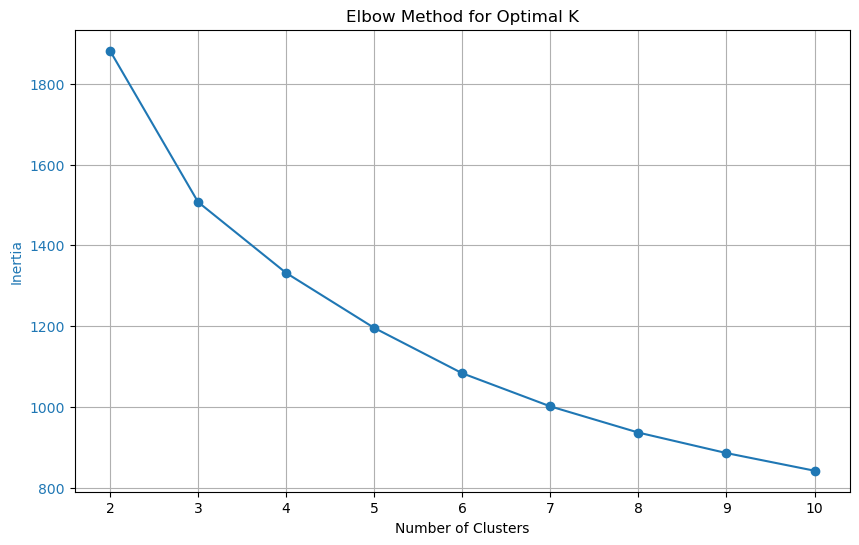

In [40]:
def plot_elbow_curve(inertia, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores to find the optimal number of clusters.

    Parameters:
        inertia (list or array-like): List of inertia values for different numbers of clusters.
        silhouette_scores (list or array-like): List of silhouette scores for different numbers of clusters.

    Returns:
        None

    This function plots the elbow curve and silhouette scores to help determine the optimal number of clusters
    for a clustering algorithm. The elbow curve shows the inertia (within-cluster sum of squares) for different
    numbers of clusters, while the silhouette scores measure the compactness and separation of clusters.
    The optimal number of clusters is often identified as the point where the inertia starts to decrease
    at a slower rate (the "elbow" point) and the silhouette score is highest.
    """
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot inertia (elbow curve)
    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, 11), inertia, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    # Set plot title, ticks, and grid
    plt.title('Elbow Method for Optimal K')
    plt.xticks(range(2, 11))
    plt.grid(True)

    # Show the plot
    plt.show()

plot_elbow_curve(inertia, silhouette_scores)

In [41]:
def perform_clustering(data, num_clusters):
    """
    Perform K-means Clustering on the given data.

    Parameters:
    - data (array-like): The input data for clustering.
    - num_clusters (int): The number of clusters to form.

    Returns:
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Inverse transform cluster centers to original feature space
    cluster_centers = scaler.inverse_transform(cluster_centers)
    
    return clusters, cluster_centers

In [42]:
def visualize_clusters(data, clusters, cluster_centers, kmeans):
    """
    Visualize the clusters along with predicted points.

    Parameters:
    - data (array-like): The original data.
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    - kmeans (KMeans): Fitted KMeans model.
    """
    # Visualize original data points
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        cluster_data = data[clusters == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='red', label='Cluster Centers')
    # Predict and visualize additional points
    for center in cluster_centers:
        # Generate multiple random points around each cluster center
        for _ in range(5):
            random_index = np.random.randint(len(data))
            random_point = data[random_index] + np.random.randn(1, data.shape[1]) * 0.1
            cluster_label = kmeans.predict(random_point)[0]
            plt.scatter(random_point[:, 0], random_point[:, 1], marker='x', color='black', alpha=0.5)
            
    
    plt.xlabel('CES-D_total_score')
    plt.ylabel('MBI_Academic_Efficacy')
    plt.title('Clusters with Predicted Points')
    plt.legend()
    plt.grid(True)
    plt.savefig('clustring')
    plt.show()
    

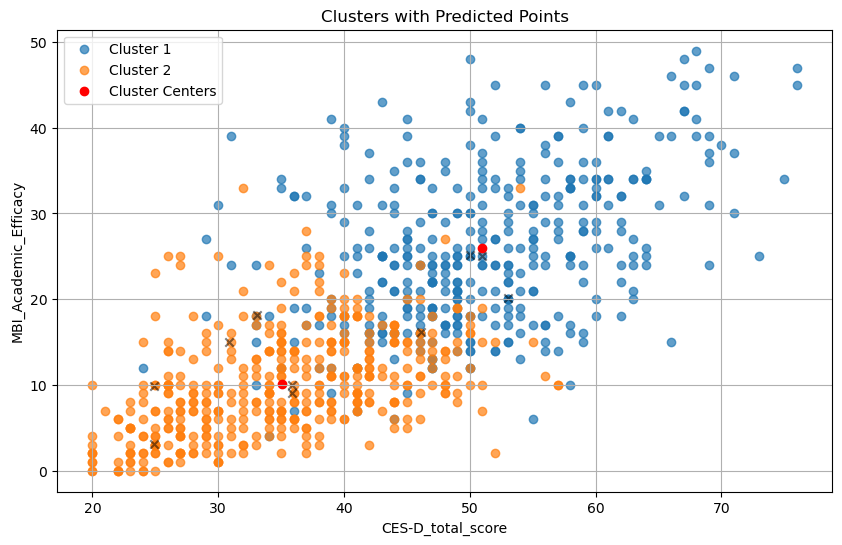

In [43]:
clusters, cluster_centers = perform_clustering(data, 2)
visualize_clusters(data.values, clusters, cluster_centers, kmeans)